<a href="https://colab.research.google.com/github/ivangd97/bioinspirada_CNN/blob/master/Copy_of_Entrega_bioinspirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3562376035841264406
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12761747562605318919
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18052666278532527093
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12108462749452764547
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [3]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print (train_images.shape)
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 , 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#datagen = ImageDataGenerator(
    #rota entre 0 y 180 (lo que pongamos) aleatoriamente las imagenes
#    rotation_range = 90,
    #aleatoriamente da zoom
    #zoom_range = 2.0,
    #width_shift_range=0.1, 
    #height_shift_range=0.1,
    #aleatoriamente da la vuelta a las imagenes
#    horizontal_flip = True,  
#    vertical_flip = True,
    #el porcentaje (entre 0 y 1) de imagenes usadas para validacion
#    validation_split = 0.1)

#datagen.fit(train_images)
print(train_images.shape)


170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [5]:
from keras import layers
from keras import models

model = models.Sequential()
#el 10 es el numero de kernels y (5,5) el tamaño de éstos
#input_shape es el tamaño de cada dato del dataset (tamaño de la imagen)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.18))

model.add(layers.Flatten())

model.add(layers.Dropout(0.18))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 64)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """


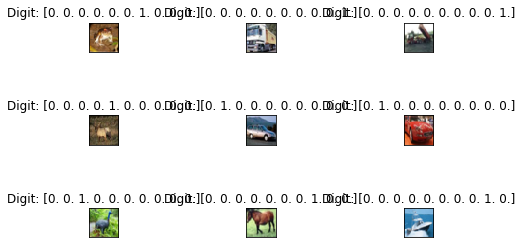

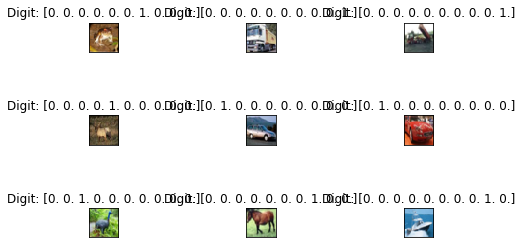

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
batch_size = 80
epochs = 80

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#history=model.fit_generator(datagen.flow(train_images, train_labels,
#          batch_size=batch_size),
#          epochs=epochs,validation_data=(test_images, test_labels),
#          verbose=1
#          )
history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/80





50000/50000 [==============================] - 12s 232us/step - loss: 2.2825 - acc: 0.1387 - val_loss: 2.2166 - val_acc: 0.1946
Epoch 2/80
50000/50000 [==============================] - 5s 95us/step - loss: 2.1096 - acc: 0.2172 - val_loss: 2.0026 - val_acc: 0.2720
Epoch 3/80
50000/50000 [==============================] - 5s 94us/step - loss: 1.9885 - acc: 0.2680 - val_loss: 1.8797 - val_acc: 0.3228
Epoch 4/80
50000/50000 [==============================] - 5s 93us/step - loss: 1.8732 - acc: 0.3131 - val_loss: 1.7537 - val_acc: 0.3659
Epoch 5/80
50000/50000 [==============================] - 5s 93us/step - loss: 1.7734 - acc: 0.3503 - val_loss: 1.7219 - val_acc: 0.3809
Epoch 6/80
50000/50000 [==============================] - 5s 94us/step - loss: 1.6968 - acc: 0.3804 - val_loss: 1.5971 - val_acc: 0.4187
Epoch 7/80
50000/50000

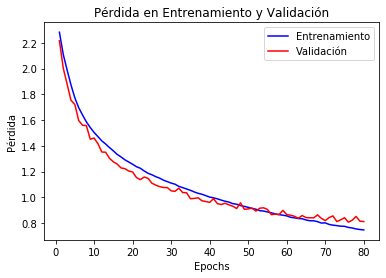

In [7]:
import matplotlib.pyplot as plt
ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

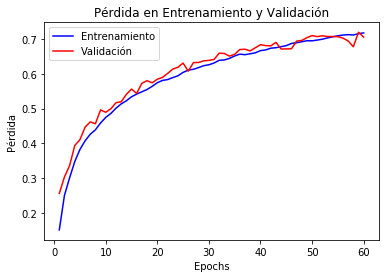

In [22]:
import matplotlib.pyplot as plt

ent_loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()